In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Load dataset

In [18]:
df = pd.read_csv("/content/student_methods.csv")

# Rename columns for consistency

In [19]:
df = df.rename(columns={
    "visual_score": "Visual",
    "auditory_score": "Auditory",
    "kinesthetic_score": "Kinesthetic",
    "learning_style": "Original_Label"
})


# Add student IDs

In [20]:
df["Student_ID"] = df.index + 1


# ----- Classify based on max score -----

In [21]:
def classify(row):
    scores = row[["Visual", "Auditory", "Kinesthetic"]]
    top_two = scores.sort_values(ascending=False).values[:2]
    if top_two[0] - top_two[1] < 1.0:
        return "Multimodal"
    return scores.idxmax().lower()

df["Predicted_Style"] = df.apply(classify, axis=1)

# Optional: compare predictions to original labels

In [22]:
df["Match"] = df["Predicted_Style"] == df["Original_Label"]

# ----- Graph 1: Bar plot per student -----

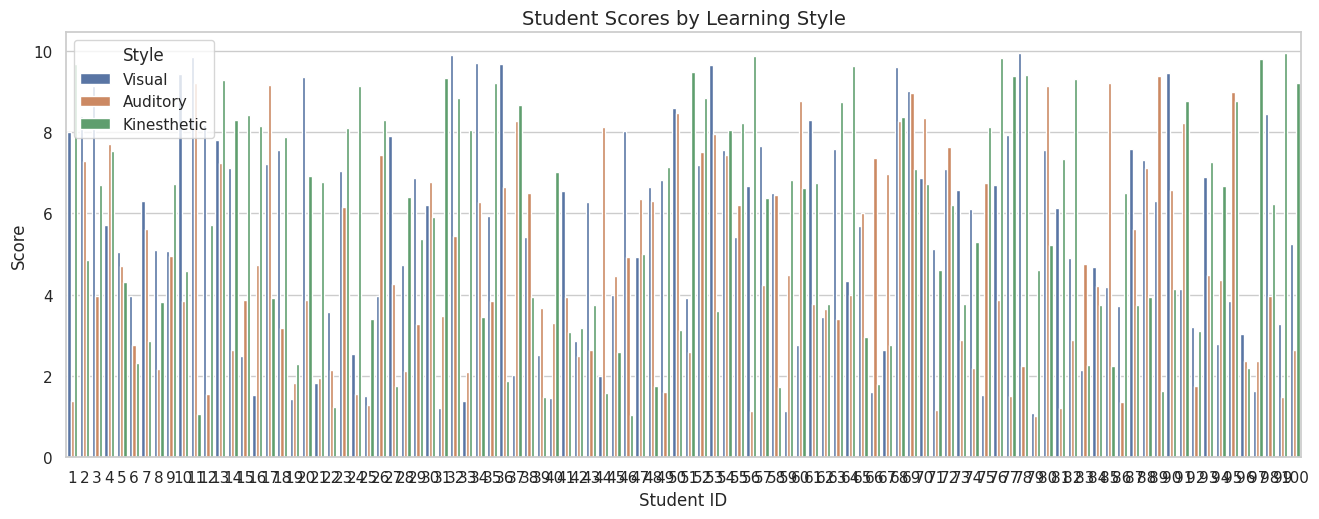

In [36]:
plt.figure(figsize=(14, 6))
df_melted = df.melt(id_vars=["Student_ID"], value_vars=["Visual", "Auditory", "Kinesthetic"],
                    var_name="Style", value_name="Score")
sns.barplot(data=df_melted, x="Student_ID", y="Score", hue="Style", dodge=True)
plt.title("Student Scores by Learning Style", fontsize=14)
plt.xlabel("Student ID", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Style")
plt.tight_layout(pad=3.0)
plt.show()


# ----- Graph 2: Pie chart of predicted learning styles -----

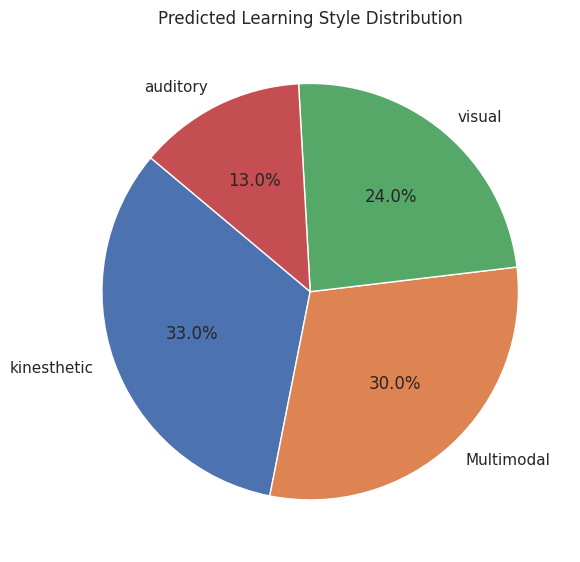

In [23]:
plt.figure(figsize=(6, 6))
style_counts = df["Predicted_Style"].value_counts()
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Predicted Learning Style Distribution")
plt.tight_layout()
plt.show()